In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm

/Users/catair/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# acf and pacf function

def plot_acf_pacf(ts, zipcode, figsize=(10,8), lags = 12):
    fig,ax = plt.subplots(nrows=3, figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax

In [3]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [4]:
zips_grouped = pd.read_pickle("zips_grouped.pkl")
pred_roi_df = pd.read_pickle("pred_roi_df.pkl")
pred_roi_df

,zipcode,roi_2
0,78702.0,-16.676245


In [5]:
zip_78758 = zips_grouped.loc[78758]
# Run a grid with pdq and seasonal pdq parameters to determine the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78758,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1720.1211389405871
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1374.7611263645747
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1189.755249880866
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =918.315021872601
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =890.9605755942079
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =981.5100251402276
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1132.7039690100848
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1119.8782883165811
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =909.5534173544443
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =889.9121391518595
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =636.8055014423921
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =956.4449137236995
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =859.0569642357375
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =825.1844666659723
ARIMA (0, 0, 0) x

ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =1002.0804852310677
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =631.9836811769401
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =633.609140196025
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =445.850191841643
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =448.2942026267061
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =250.67306617084003
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =961.904344798505
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =769.8988495572919
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =813.163671999764
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =611.1892664449626
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =647.6467816298324
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =817.6596619311579
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =803.3990118446554
ARIMA (0, 2, 1) x (1, 0, 1, 12)12 : 

ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =623.0118283079985
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =673.9901541937855
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1076.5299084718392
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =803.8140040164924
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =786.342602083116
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =638.6940655538369
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =623.499533636335
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =470.07722637953066
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =1269.5180543978972
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =620.6665957517507
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =619.5656717580297
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =441.54974514200865
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =441.3374230148831
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =252.57407661679485
ARIMA (1, 1, 1) x

ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =637.4708673415201
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =663.2628283375649
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =443.21655891060135
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =479.4670041777159
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =248.9345088951048
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =529.6069557875576
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =972.7904231810802
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =897.7890744379995
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =837.1474520372319
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =824.1697855485907
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =665.2589818627813
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =964.1886607939513
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =816.0573478894296
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =831.270895964444
ARIMA (2, 0, 2) x (1

ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =621.3784358717795
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =823.0763876078088
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =771.6848790630305
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =754.1654220357369
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =605.1851915790267
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =607.5940425548557
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =424.49405596256906
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =922.7759157848463
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =590.4927329221374
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =589.2750644386376
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =409.98739229427446
ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =411.3353735552473
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =221.18622006885246
ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =219.30197210717395


pdq         (2, 2, 1)
pdqs    (2, 2, 1, 12)
aic           214.589
Name: 467, dtype: object

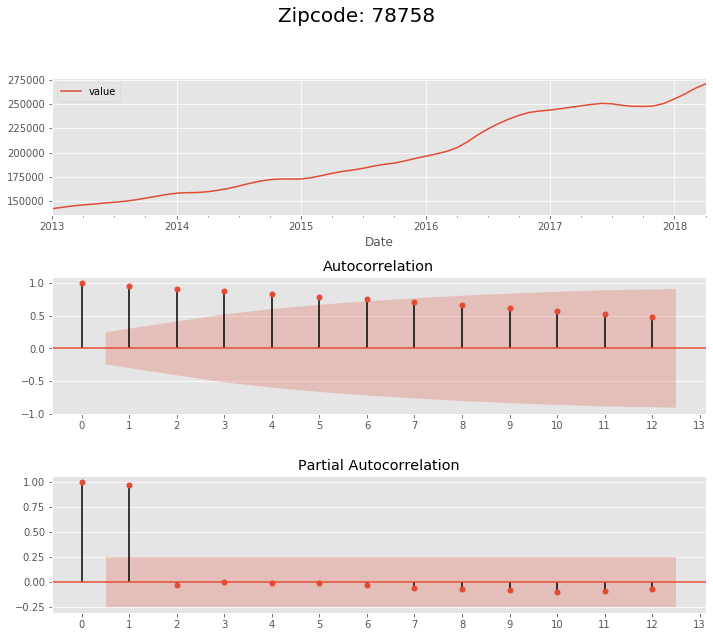

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0640      0.657      1.619      0.106      -0.224       2.352
ar.L2         -0.3961      0.543     -0.730      0.466      -1.460       0.668
ma.L1          0.1298      0.838      0.155      0.877      -1.514       1.773
ar.S.L12      -0.8618      0.342     -2.518      0.012      -1.533      -0.191
ar.S.L24      -0.5400      0.804     -0.672      0.502      -2.116       1.036
ma.S.L12       0.1673      0.426      0.393      0.695      -0.668       1.002
sigma2      1.005e+06   1.18e+06      0.855      0.393    -1.3e+06    3.31e+06


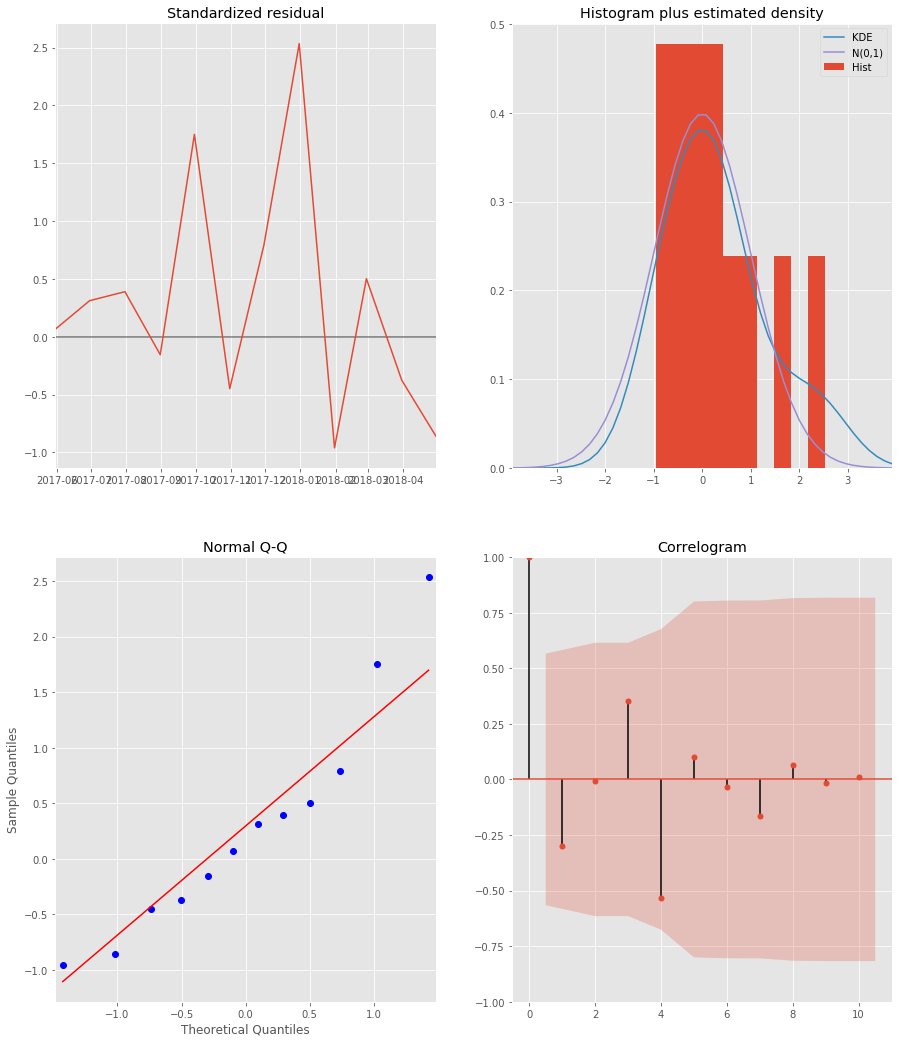

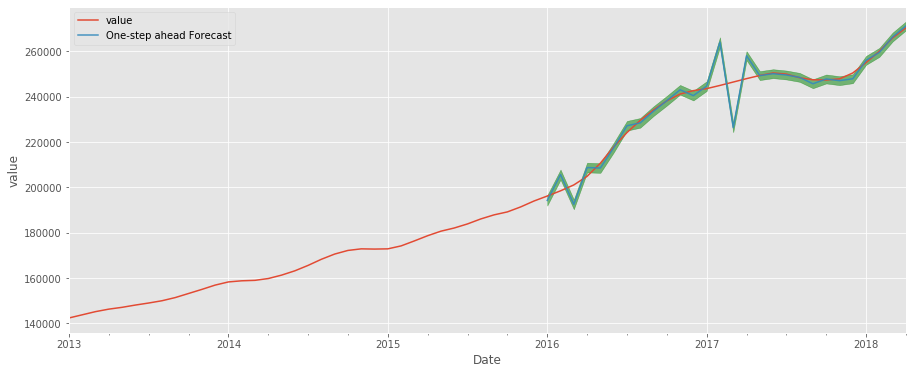

The Mean Squared Error of our forecasts is 37533912.46


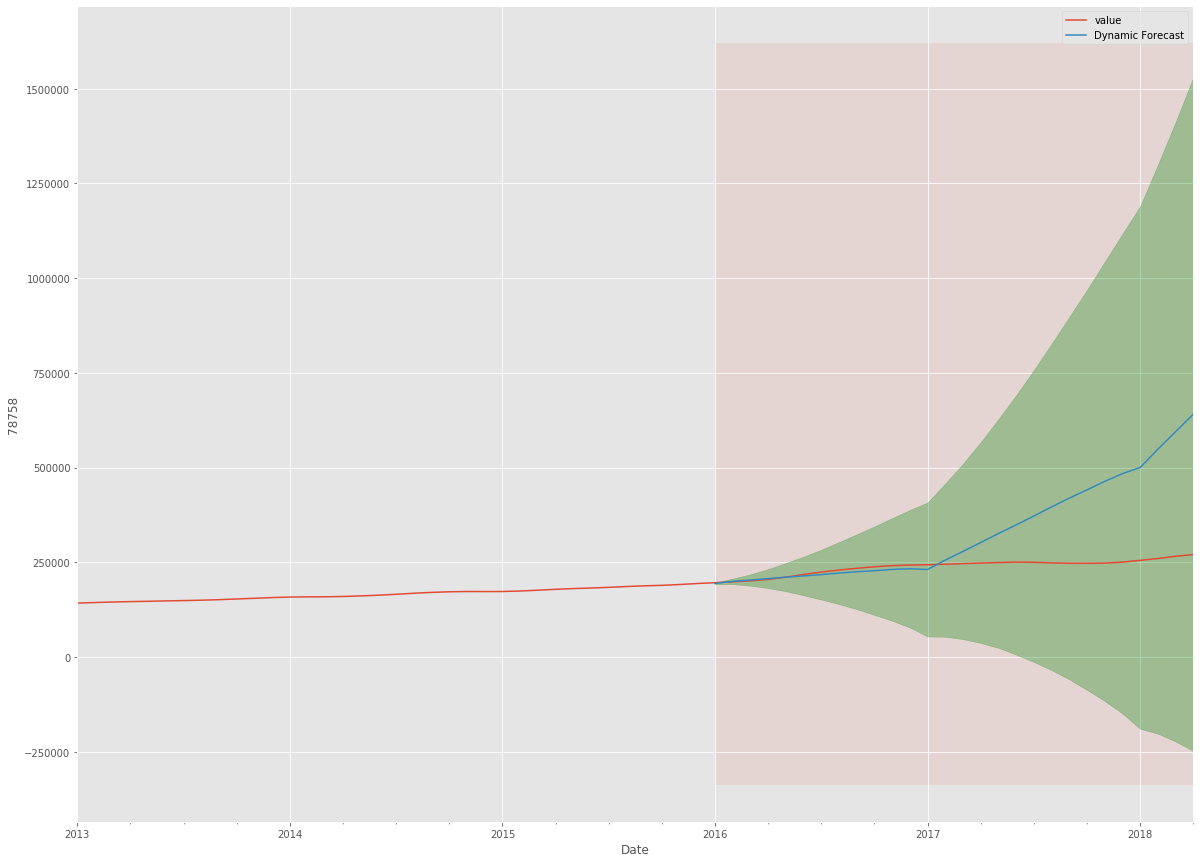

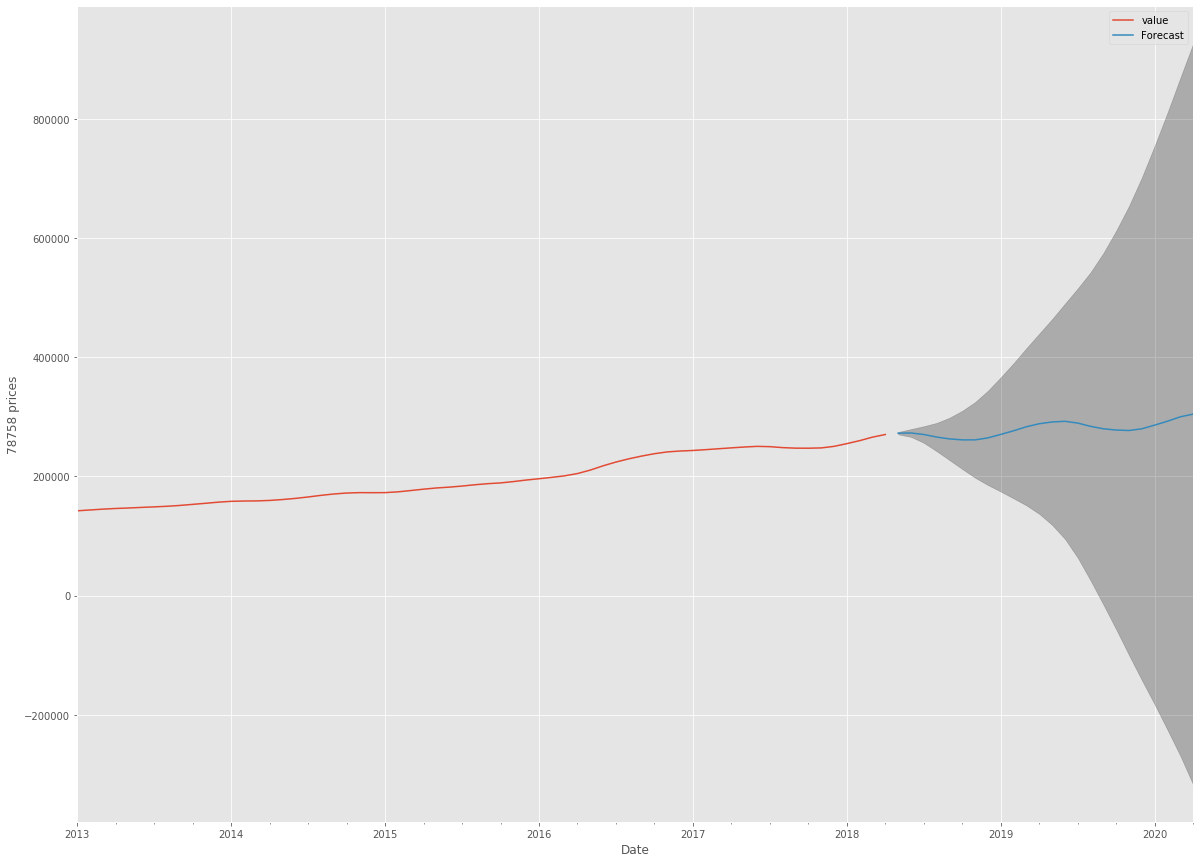

In [9]:
# acf, pacf
plot_acf_pacf(zip_78758, 78758)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78758, 
                                        order=(2, 2, 1), 
                                        seasonal_order=(2, 2, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78758['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78758_forecasted = pred.predicted_mean
zip_78758_truth = zip_78758['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78758_forecasted - zip_78758_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78758['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78758_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78758')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78758.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78758 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78758, roi_2] 

In [10]:
zip_78702 = zips_grouped.loc[78702]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78702,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1784.2276945951512
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1424.6612198514524
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1218.7296360916077
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =933.8925143907263
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =862.0291312327794
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1360.0947439672132
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1134.5931514912909
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1109.1653989643328
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =877.7583435531058
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =859.1183263352227
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =623.1254980942614
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =1313.5092123408085
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =877.9362778889043
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =1458.2997368369302
ARIMA (0, 0,

ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =1040.410466724335
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =652.6866271577566
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =659.8956061979783
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =463.9276233656364
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =468.6664354066458
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =264.3235095299358
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =1021.5712030769623
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =801.666096024691
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =855.1287792163207
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =639.9118687035382
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =684.2143598398336
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =862.6966295578
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =834.7823594831112
ARIMA (0, 2, 1) x (1, 0, 1, 12)12 : A

ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =762.8801118338771
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =725.5489959517656
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =2183.259000323686
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =833.5474460192096
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =819.4338890064724
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =667.0675271323519
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =644.877441584341
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =490.9035860322057
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =483.189391605486
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =660.4082379352255
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =640.6186170239623
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =448.8892075178174
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =469.2818961740271
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =259.82530882404507
ARIMA (1, 1, 1) x (2,

ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =642.1704598055918
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =706.2362333279946
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =451.519992766861
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =521.1899119032691
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =263.1573637851125
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =266.1946044760982
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =1000.2081271536694
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =859.5253673950284
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =918.1751009106911
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =941.0056610008552
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =703.6090542042664
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =2125.596180102056
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =819.6979897235261
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =815.4246311147951
ARIMA (2, 0, 2) x (1

ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =617.3440202751384
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =650.6454090301258
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =1044.016838741111
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =793.3438488472807
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =778.4484852686153
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =620.7404370246242
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =632.7488143716955
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =442.5998242722608
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =1036.7692107567727
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =603.3898761085536
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =602.3539475347325
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =417.3363301655858
ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =424.52222556909874
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =219.9042979275082
ARIMA (2, 2, 2) x 

pdq         (2, 2, 0)
pdqs    (2, 2, 1, 12)
aic           216.515
Name: 449, dtype: object

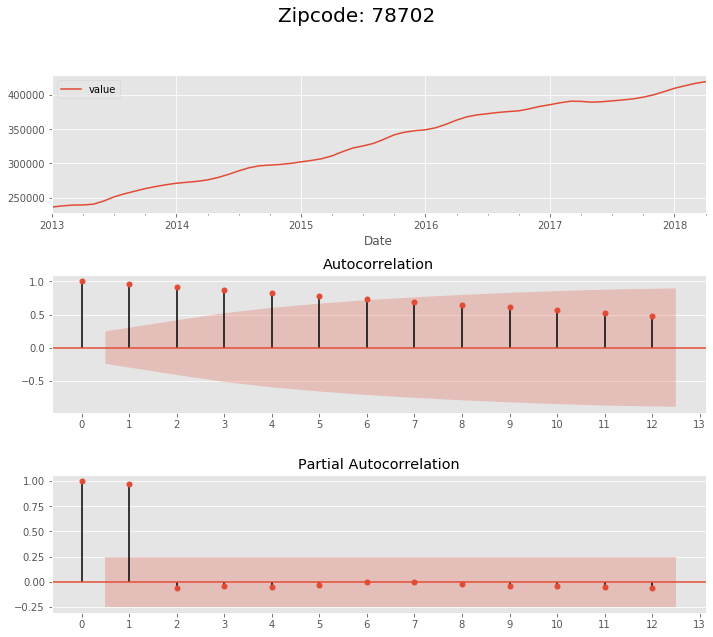

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5893      0.314      1.876      0.061      -0.026       1.205
ar.L2         -0.7688      0.115     -6.711      0.000      -0.993      -0.544
ar.S.L12      -1.2604      0.454     -2.778      0.005      -2.150      -0.371
ar.S.L24      -0.4751      0.425     -1.117      0.264      -1.309       0.359
ma.S.L12       0.0662      0.061      1.086      0.277      -0.053       0.186
sigma2      1.613e+06   1.27e+06      1.265      0.206   -8.86e+05    4.11e+06


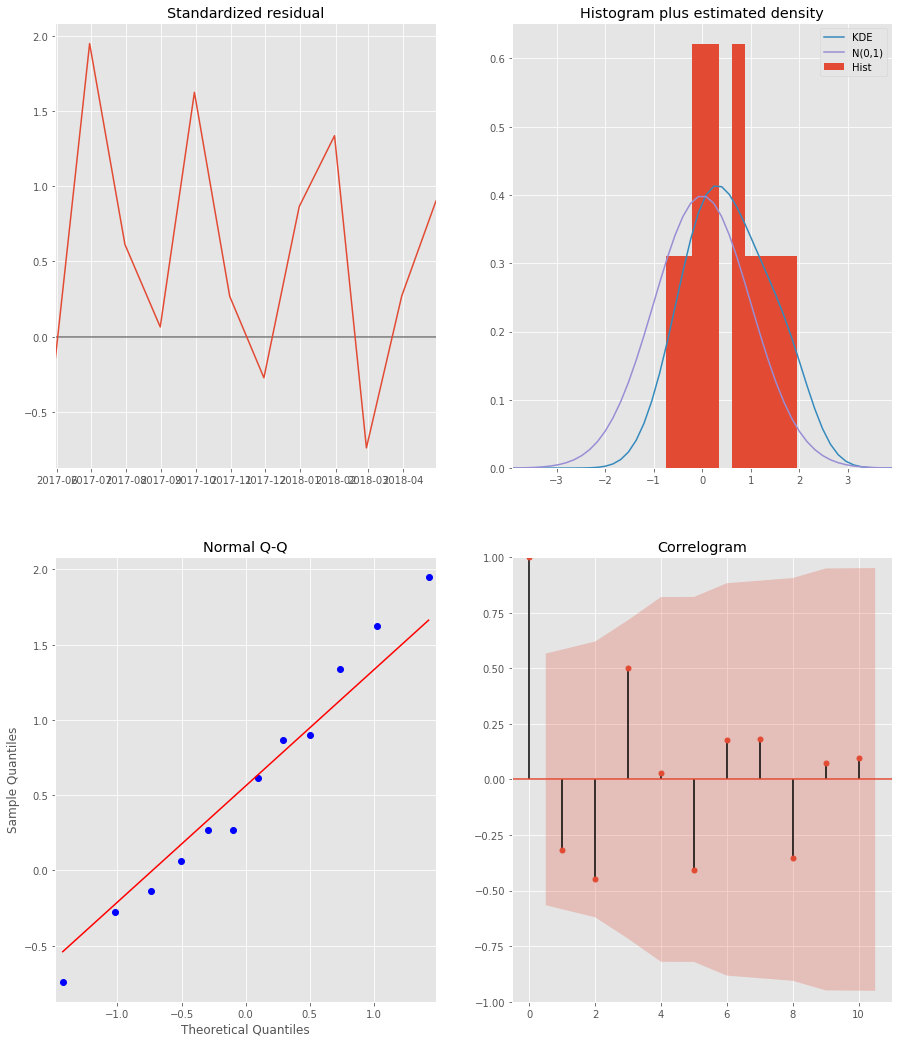

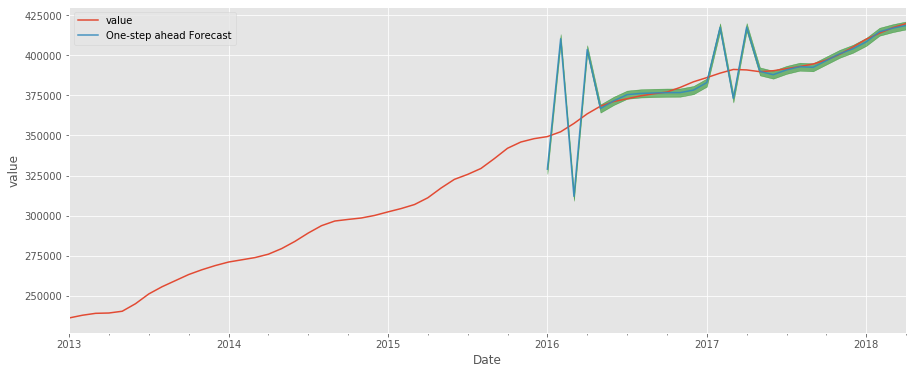

The Mean Squared Error of our forecasts is 335387221.22


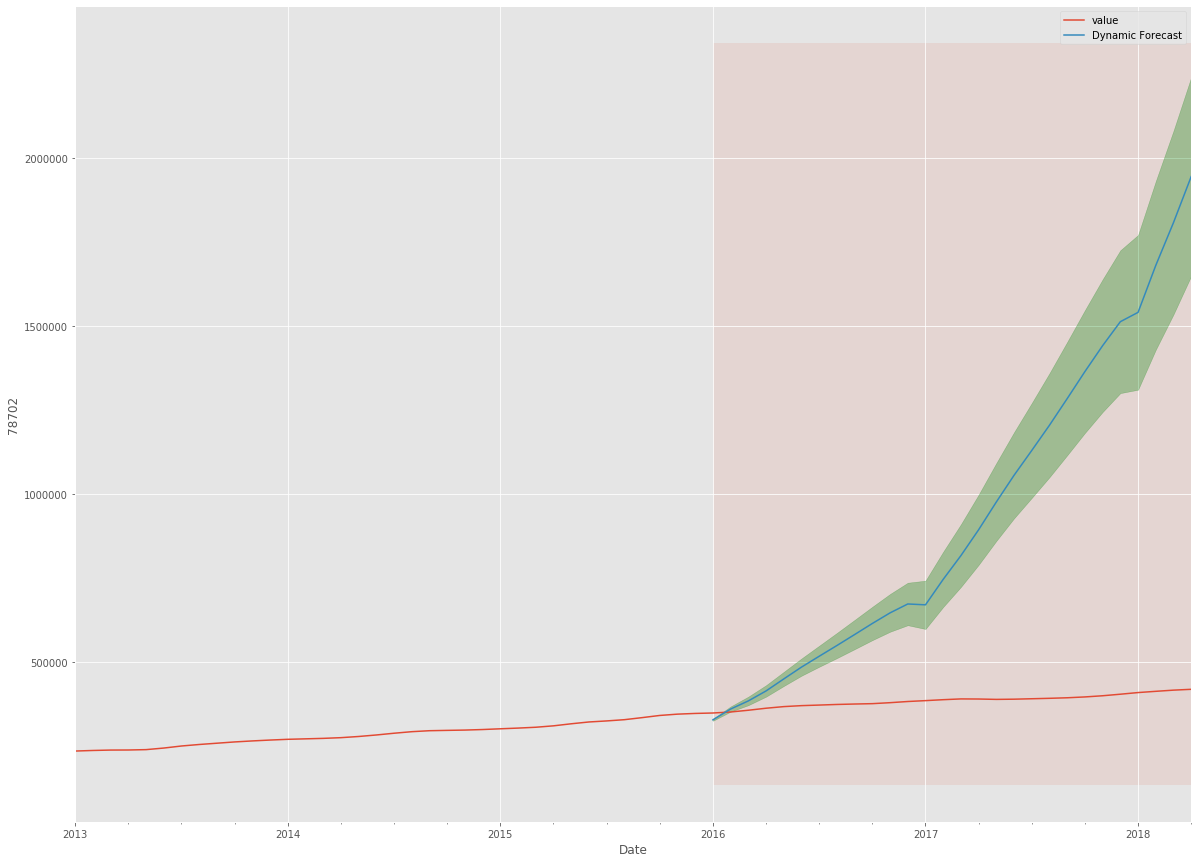

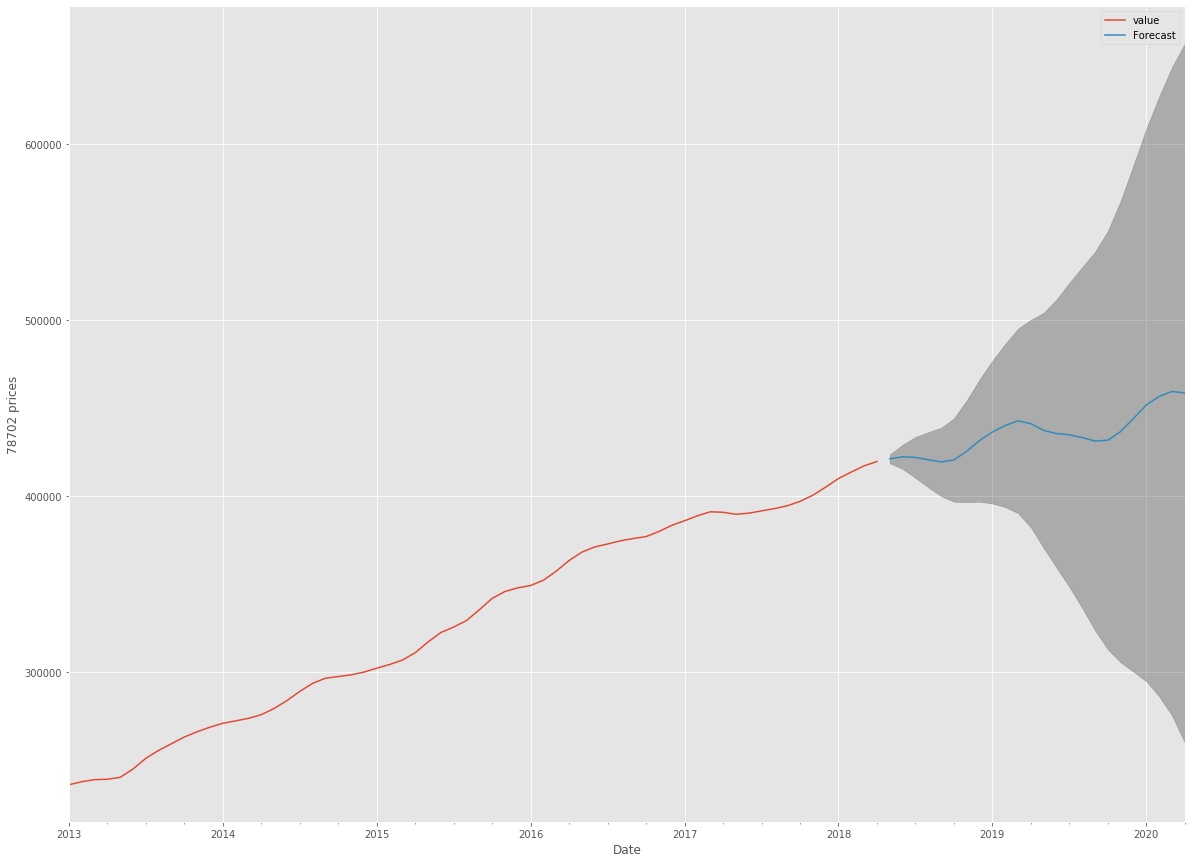

In [11]:
# acf, pacf
plot_acf_pacf(zip_78702, 78702)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78702, 
                                        order=(2, 2, 0), 
                                        seasonal_order=(2, 2, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78702['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78702_forecasted = pred.predicted_mean
zip_78702_truth = zip_78702['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78702_forecasted - zip_78702_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78702['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78702_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78702')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78702.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78702 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78702, roi_2] 

In [12]:
zip_78744 = zips_grouped.loc[78744]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78744,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1681.4023145478507
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =158414.85155604067
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1147.1972477083682
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =882.8786935276303
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =795.6288336348925
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1370.358775077172
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1006.9518862807057
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =946.6061926436773
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =807.2648016366766
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1122.0990380209896
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =561.8505254222812
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =1097.13422689385
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =749.6528373854335
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =748.362422395075
ARIMA (0, 0, 0) x

ARIMA (0, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =622.7692592500292
ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =465.0732065392091
ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =444.74026691672003
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =618.8455075568896
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =620.6445320660844
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =441.8010538743415
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =441.48573384991596
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =241.68388880342627
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =952.1609062359811
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =763.9681582293359
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =810.9305188278828
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =606.180695549075
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =646.9543286912359
ARIMA (0, 2, 1) x (0, 2, 1, 12)1

ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =776.8496123421165
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =818.88323248673
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =611.234837969792
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =657.1201753211043
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1059.7622851244885
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =791.9714981593702
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =778.7207501869501
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =631.884558029646
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =617.8299431087056
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =459.50813819930335
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =440.39696405126807
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =608.5784192244887
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =608.7410240283556
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =443.06519279275346
ARIMA (1, 1, 1) x (2

ARIMA (2, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =456.48739716335695
ARIMA (2, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =1218.1006731709706
ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =626.4612370391707
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =604.7566904200042
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =444.1562765608291
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =440.1698829090791
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =249.52766566848717
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =248.58016473837978
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =951.0717189996453
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =772.7196072202596
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =857.2409946276584
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =605.1639088757283
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =666.362856882607
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =2189.7713492833186
ARIMA (2, 0, 2) 

ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =741.1306034817052
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =805.7281483896785
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =583.5882282570722
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =623.019147015273
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =1057.9918244330074
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =755.2112923983132
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =741.0649244639185
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =596.33325266596
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =594.3793816315336
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =429.8199903749687
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =410.9754423848684
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =571.3133969747794
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =569.5707126251414
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =402.35066006412546
ARIMA (2, 2, 2) x (2,

pdq         (2, 2, 0)
pdqs    (2, 2, 0, 12)
aic           205.403
Name: 448, dtype: object

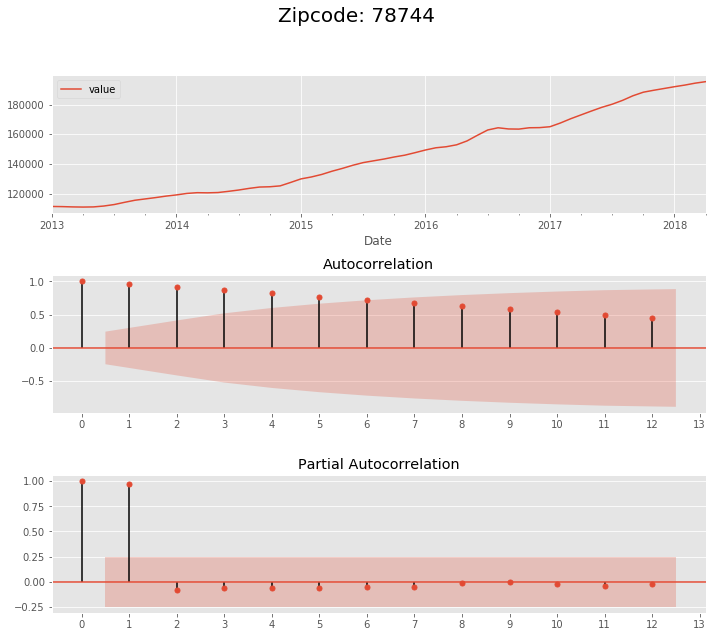

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9031      0.470      1.922      0.055      -0.018       1.824
ar.L2         -0.7449      0.417     -1.786      0.074      -1.562       0.073
ar.S.L12      -1.4162      0.268     -5.293      0.000      -1.941      -0.892
ar.S.L24      -1.2455      0.184     -6.780      0.000      -1.605      -0.885
sigma2      6.909e+05   6.16e+05      1.122      0.262   -5.16e+05     1.9e+06


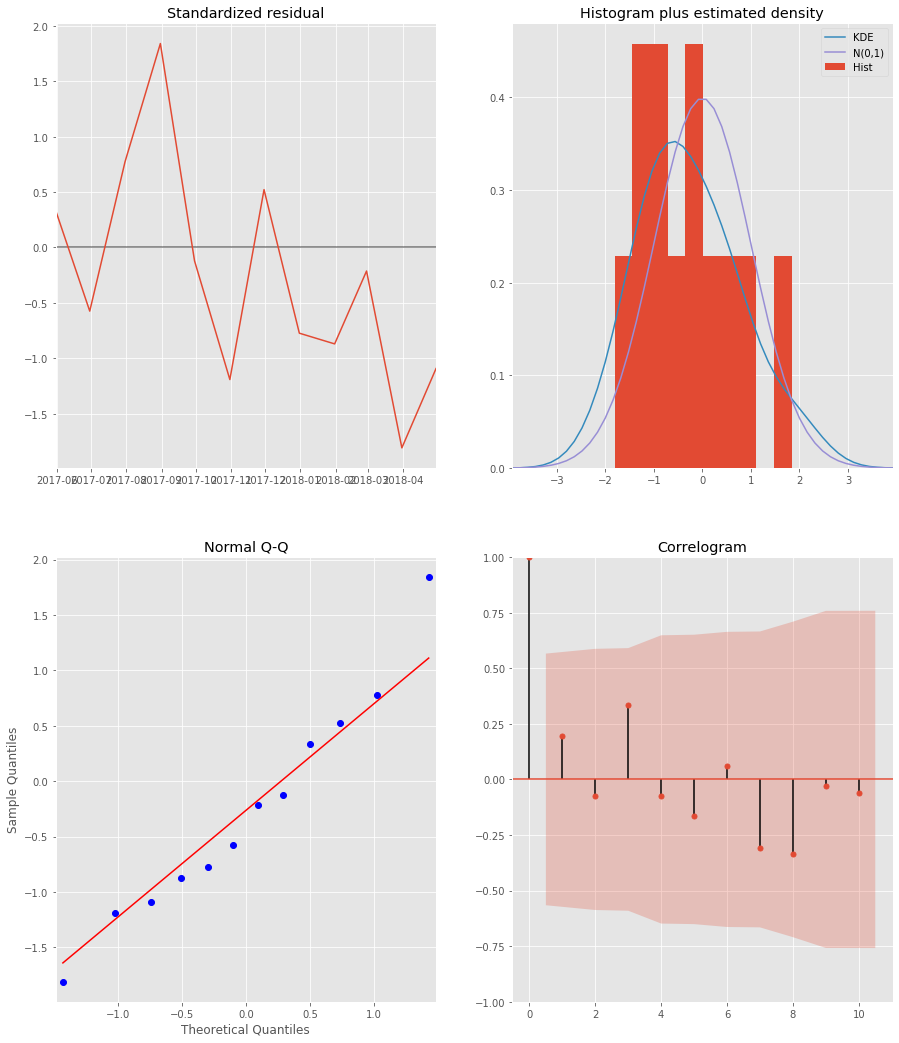

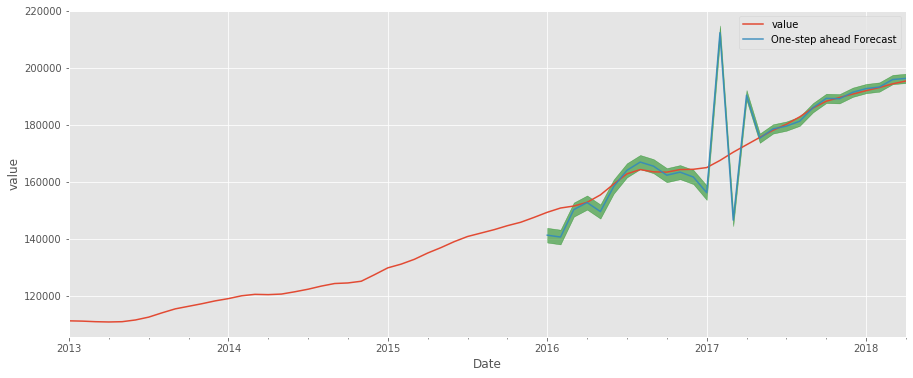

The Mean Squared Error of our forecasts is 114153873.76


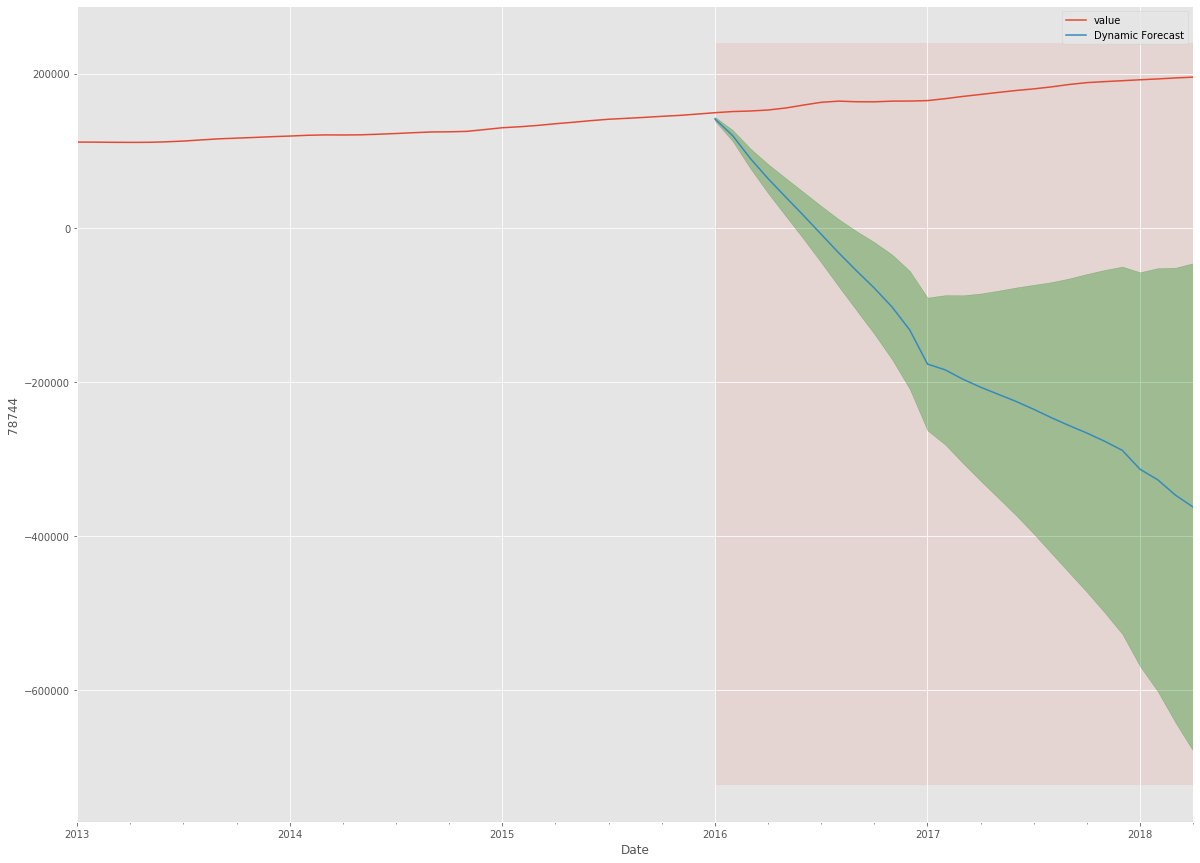

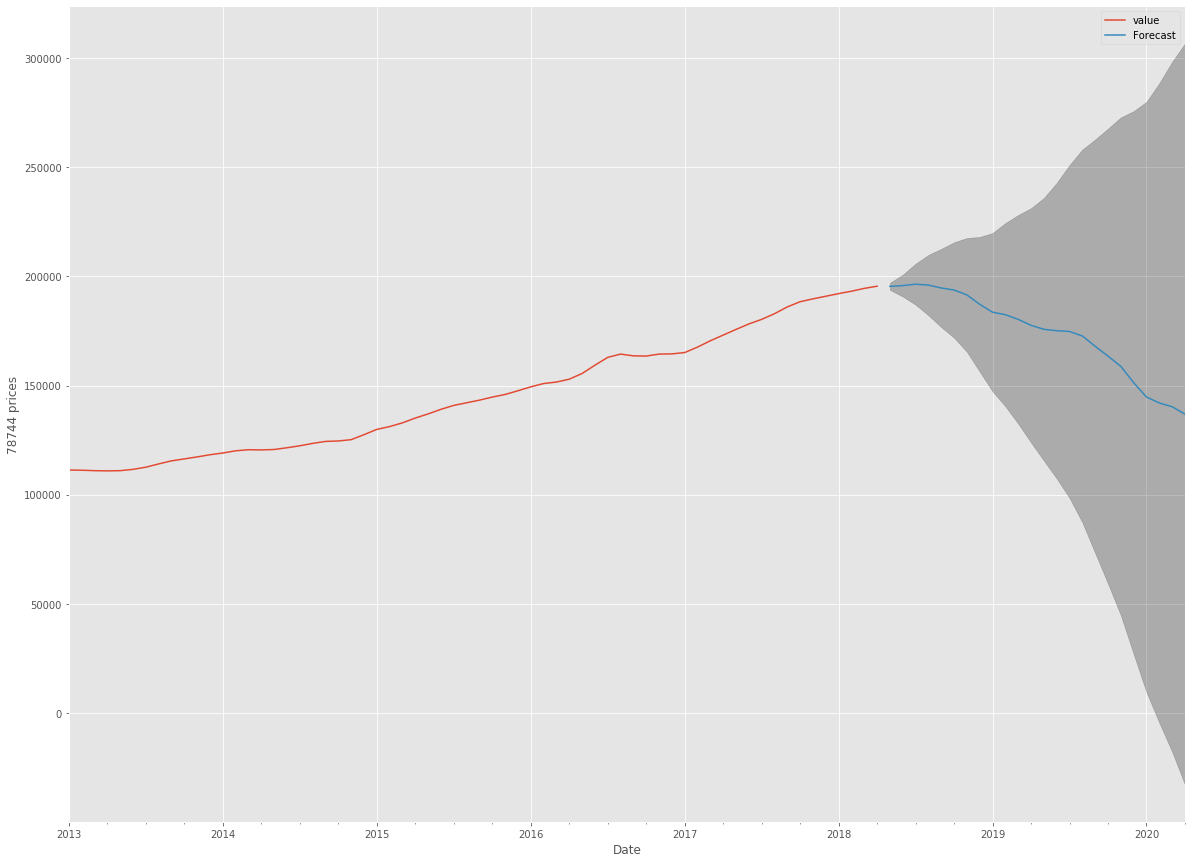

In [14]:
# acf, pacf
plot_acf_pacf(zip_78744, 78744)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78744, 
                                        order=(2, 2, 0), 
                                        seasonal_order=(2, 2, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78744['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78744_forecasted = pred.predicted_mean
zip_78744_truth = zip_78744['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78744_forecasted - zip_78744_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78744['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78744_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78744')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78744.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78744 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78744, roi_2] 

In [15]:
zip_78741 = zips_grouped.loc[78741]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78741,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1713.822447111103
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1369.0980794285615
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1172.7525768418745
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =905.6668623420217
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =861.8685856725797
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1161.8126582292216
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1107.1404390422385
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1090.9115273765572
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =881.8525242862977
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =862.5422145265022
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =623.0189426057281
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =905.0574272047595
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =849.7868847485857
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =847.0839915860622
ARIMA (0, 0, 0)

ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =1046.8521103185337
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =629.8938004952734
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =632.9504460362539
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =443.4961310795364
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =448.9208916978745
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =254.45240517568777
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =990.730477013881
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =791.42671900213
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =838.4126361501823
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =632.8935642158896
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =660.8046682673053
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =1008.327220162106
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =827.2967504270981
ARIMA (0, 2, 1) x (1, 0, 1, 12)12 :

ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =645.1743579325888
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =679.886445731575
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1185.3833626748392
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =825.4972193424791
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =807.6892153500992
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =665.3299367725219
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =645.31914294932
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =478.5250673675198
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =463.48097095401533
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =636.0022947863024
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =639.6457051245625
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =446.73603251782055
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =447.8232689140422
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =256.99233829822356
ARIMA (1, 1, 1) x (

ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =666.6008249477522
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =682.7597485967252
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =460.16458679796574
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =477.42255086025904
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =256.5882508884243
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =560.1148549782216
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =990.8155921965154
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =798.0474934905177
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =856.0015089502817
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =736.8025885477832
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =676.9072101731922
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =916.0281263330692
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =815.8239675875676
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =797.864110161609
ARIMA (2, 0, 2) x (

ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =619.1585516025982
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =642.1540129121026
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =989.7384008666577
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =794.8743072356403
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =776.5171131251523
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =628.0546626668132
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =616.6442313151699
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =448.5455394580468
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =1003.4942232570077
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =594.8743894292562
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =596.7702645290015
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =412.08360304767416
ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =429.76791348734287
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =220.95370824958496
ARIMA (2, 2, 2) 

pdq         (2, 2, 1)
pdqs    (2, 2, 0, 12)
aic           211.472
Name: 466, dtype: object

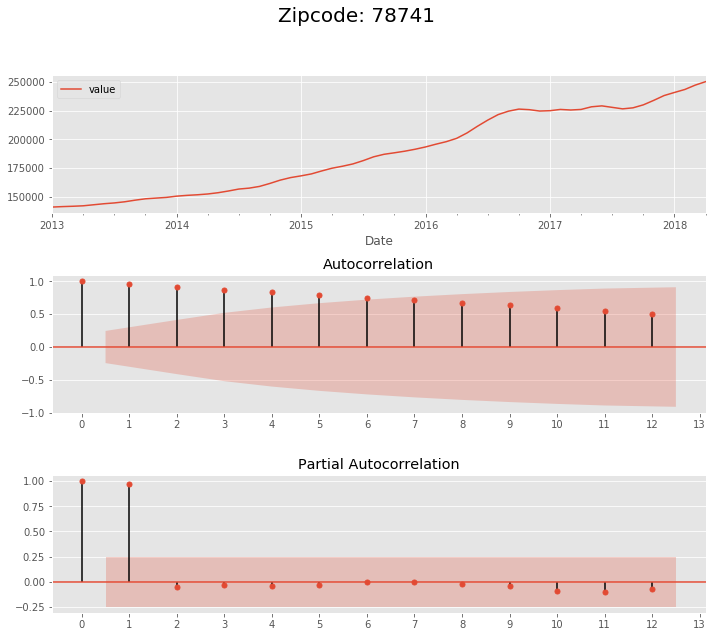

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0180      0.161      0.111      0.911      -0.298       0.334
ar.L2         -0.7835      0.132     -5.957      0.000      -1.041      -0.526
ma.L1         -0.0668      0.180     -0.371      0.711      -0.420       0.286
ar.S.L12      -2.5499      0.417     -6.122      0.000      -3.366      -1.734
ar.S.L24      -2.4021      0.304     -7.902      0.000      -2.998      -1.806
sigma2      9.853e+05   6.94e+05      1.420      0.156   -3.75e+05    2.35e+06


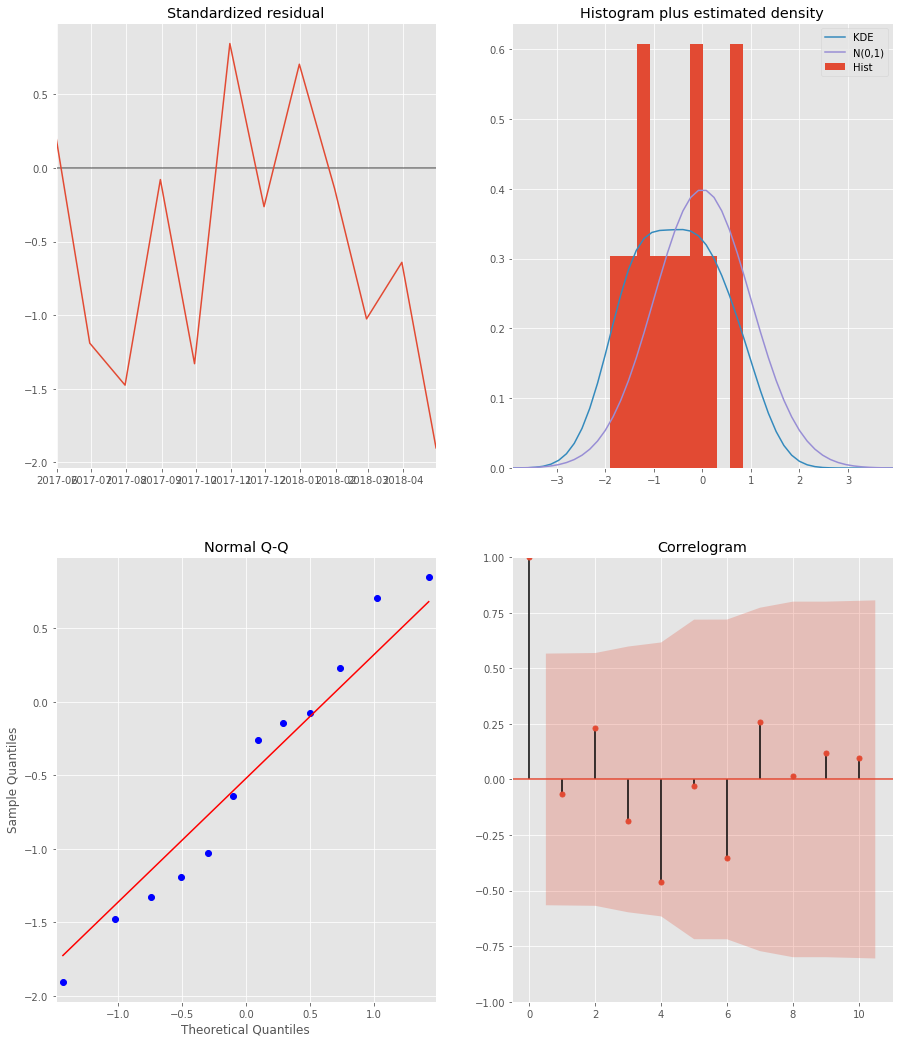

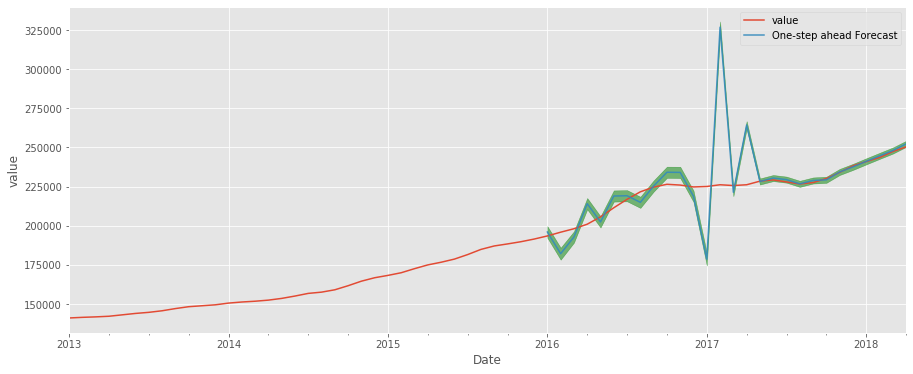

The Mean Squared Error of our forecasts is 516314756.34


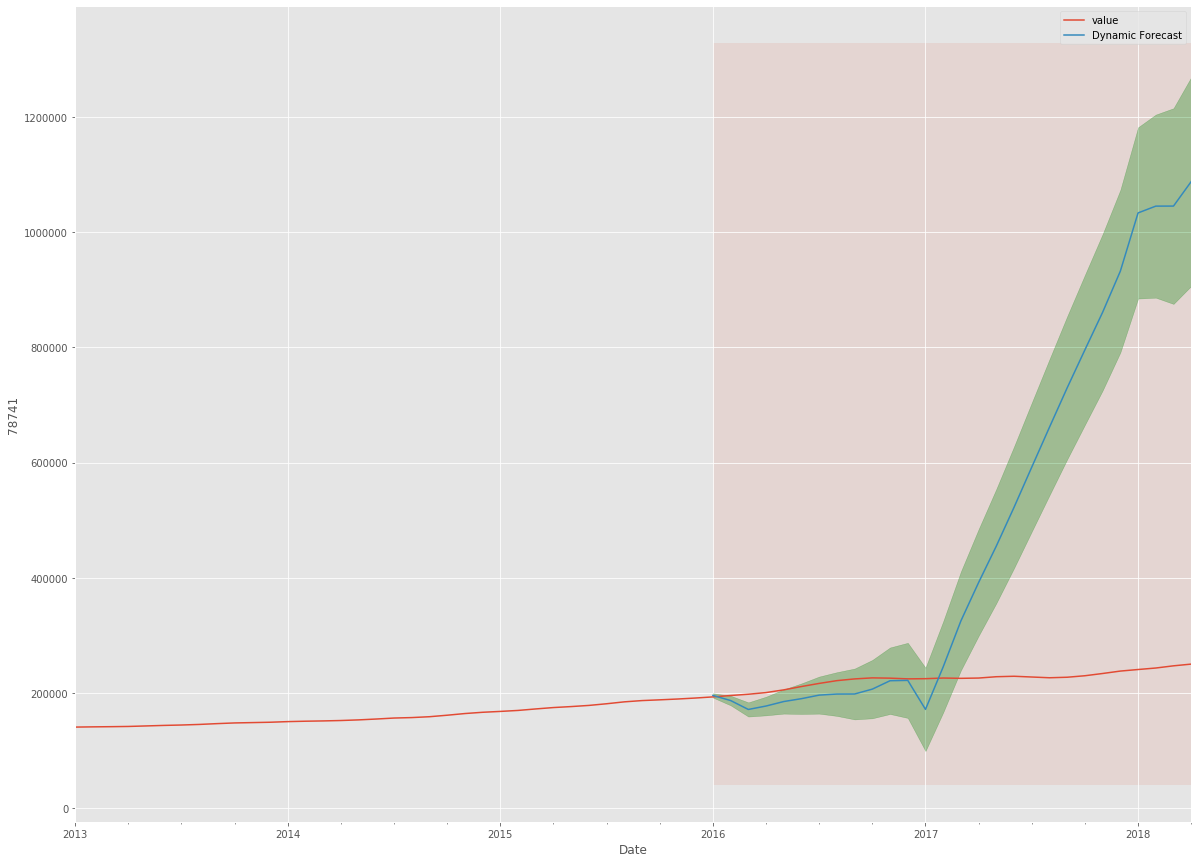

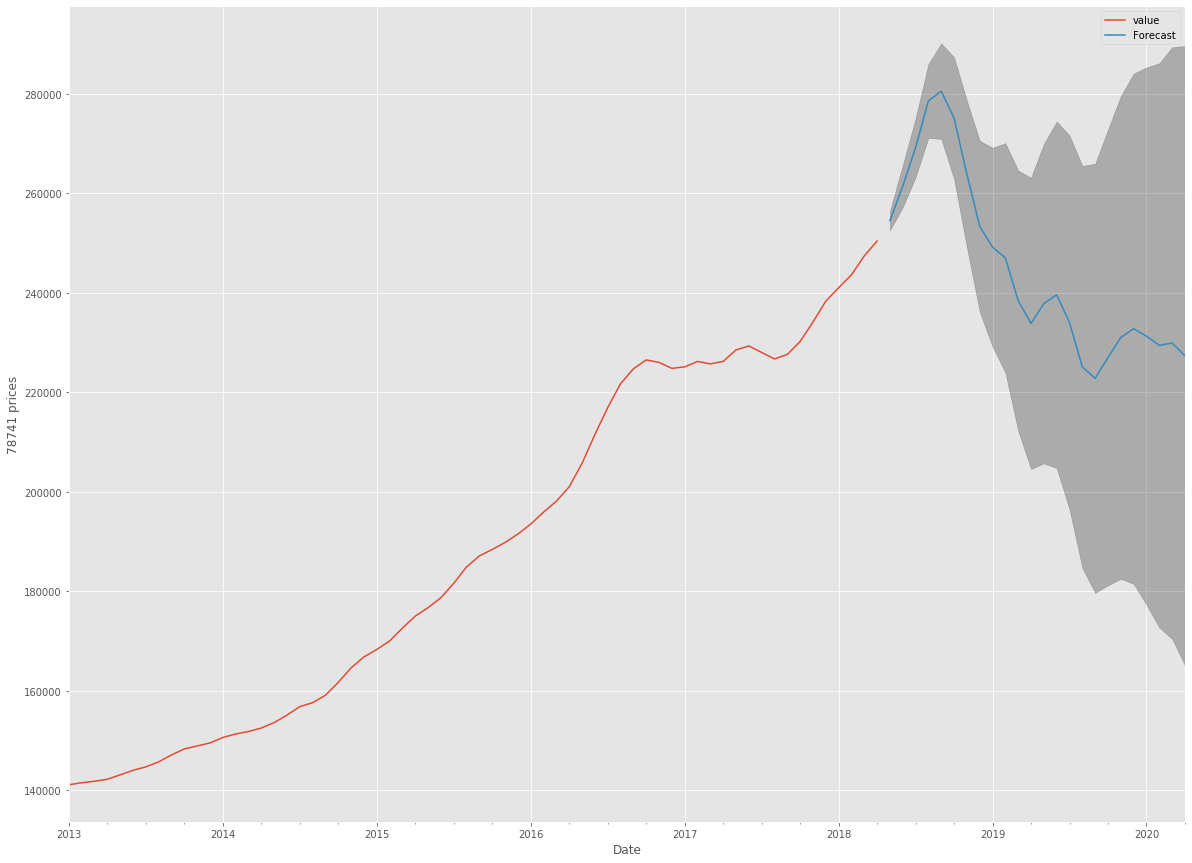

In [17]:
# acf, pacf
plot_acf_pacf(zip_78741, 78741)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78741, 
                                        order=(2, 2, 1), 
                                        seasonal_order=(2, 2, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78741['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78741_forecasted = pred.predicted_mean
zip_78741_truth = zip_78741['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78741_forecasted - zip_78741_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78741['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78741_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78741')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78741.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78741 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78741, roi_2] 

In [18]:
zip_78753 = zips_grouped.loc[78753]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78753,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1706.1507611944319
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1362.4172776545472
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1163.772078999048
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =899.3618926975913
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =833.4056561499513
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1192.4009298037033
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1063.470469214472
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1038.8804112683881
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =855.6310143283519
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1158.08152967585
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =604.6557776725641
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =1112.4890434761544
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =817.8255520396997
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =796.3513131139855
ARIMA (0, 0, 0) 

ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =430.1044702739212
ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =1083.5956615123387
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =611.3432857534222
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =612.9984353011433
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =417.83401471040526
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =419.32694735988974
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =238.85196273342513
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =942.1744417258664
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =760.6770163601077
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =792.7734033740503
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =591.912445862401
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =636.4644249772706
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =987.9284524612553
ARIMA (0, 2, 1) x (1, 0, 0, 12)

ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =651.4261574121916
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1041.6978637708414
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =792.007012180657
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =776.9897122810812
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =617.7890247455733
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =605.3109240301303
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =432.5582982164774
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =1059.1609059125535
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =613.5467380338278
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =610.298908448026
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =419.16093936867577
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =420.7890258671702
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =242.18876681757823
ARIMA (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =244.1945376693751
ARIMA (1, 1, 2) x 

ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =621.3577585283505
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =421.71279122554324
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =422.9508675187553
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =238.51296108921647
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =239.93777664489645
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =951.2198077699924
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =849.1554795361961
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =807.7933303022124
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =626.4977344628389
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =653.2571868807997
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =1024.1447484579926
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =789.7090523314291
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =782.3525975101118
ARIMA (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =620.3406366513397
ARIMA (2, 0, 2) 

ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =924.2067088087422
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =760.0127642028898
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =742.8208793299808
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =579.95635684392
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =565.3783026106777
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =405.6634932220254
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =1221.2476794878012
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =569.4600099412787
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =579.3075438790182
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =391.8516255034718
ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =394.8654568370493
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =209.04289433536485
ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =214.52722406464474


pdq         (2, 2, 2)
pdqs    (2, 2, 0, 12)
aic           209.043
Name: 484, dtype: object

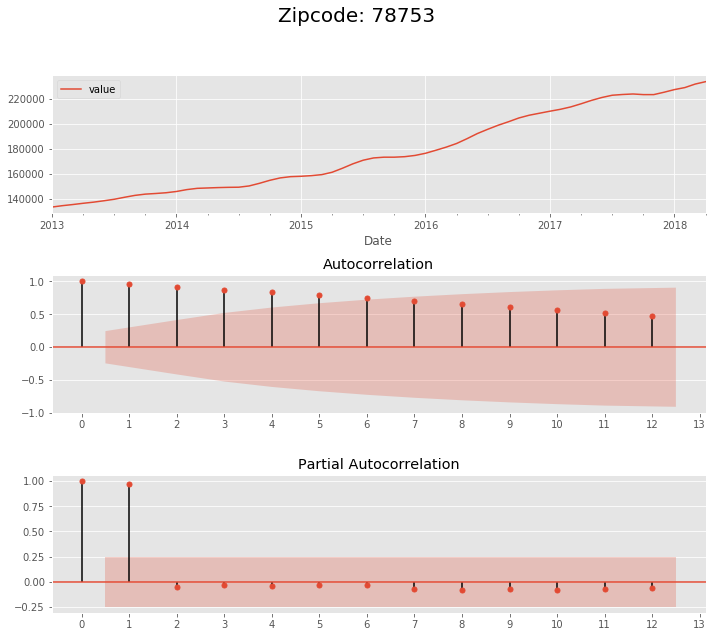

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2559      0.483      2.600      0.009       0.309       2.203
ar.L2         -0.5794      0.713     -0.813      0.416      -1.977       0.818
ma.L1         -1.4960      0.739     -2.024      0.043      -2.945      -0.047
ma.L2          0.9282      0.919      1.010      0.313      -0.874       2.730
ar.S.L12      -1.1382      1.419     -0.802      0.423      -3.920       1.644
ar.S.L24      -0.1732      1.004     -0.172      0.863      -2.141       1.795
sigma2      1.248e+06   8.59e-07   1.45e+12      0.000    1.25e+06    1.25e+06


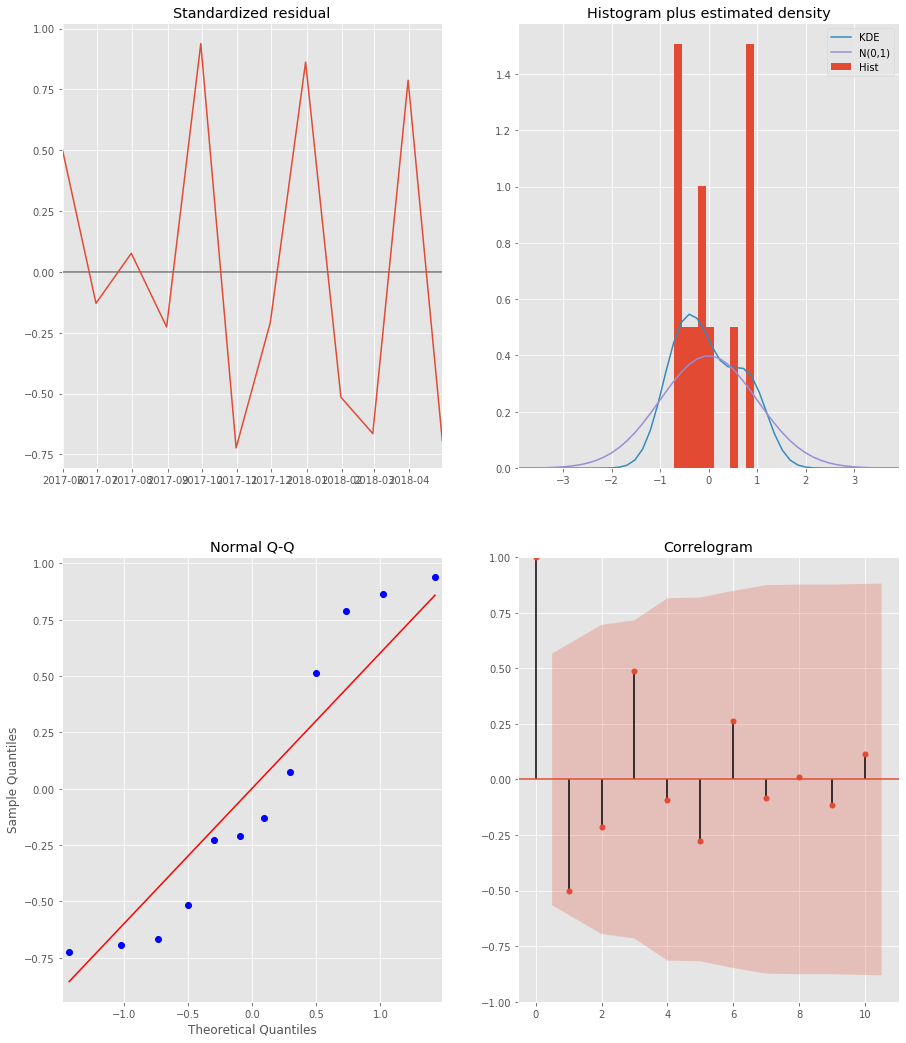

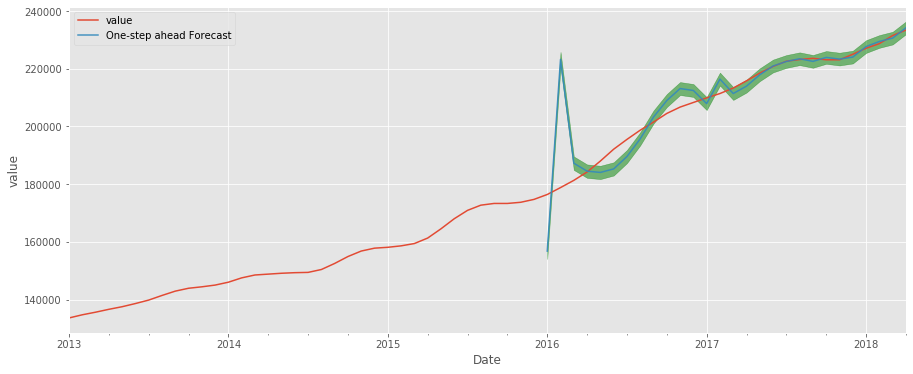

The Mean Squared Error of our forecasts is 93795338.61


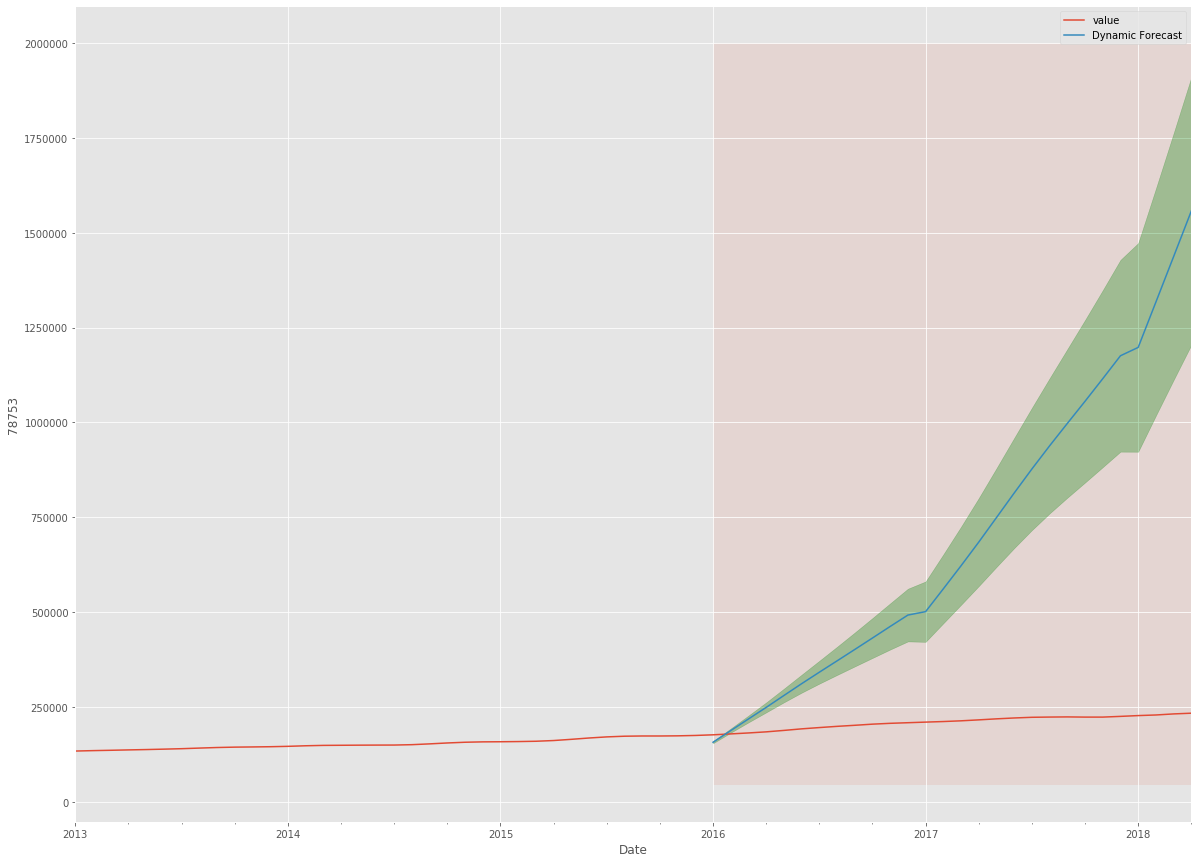

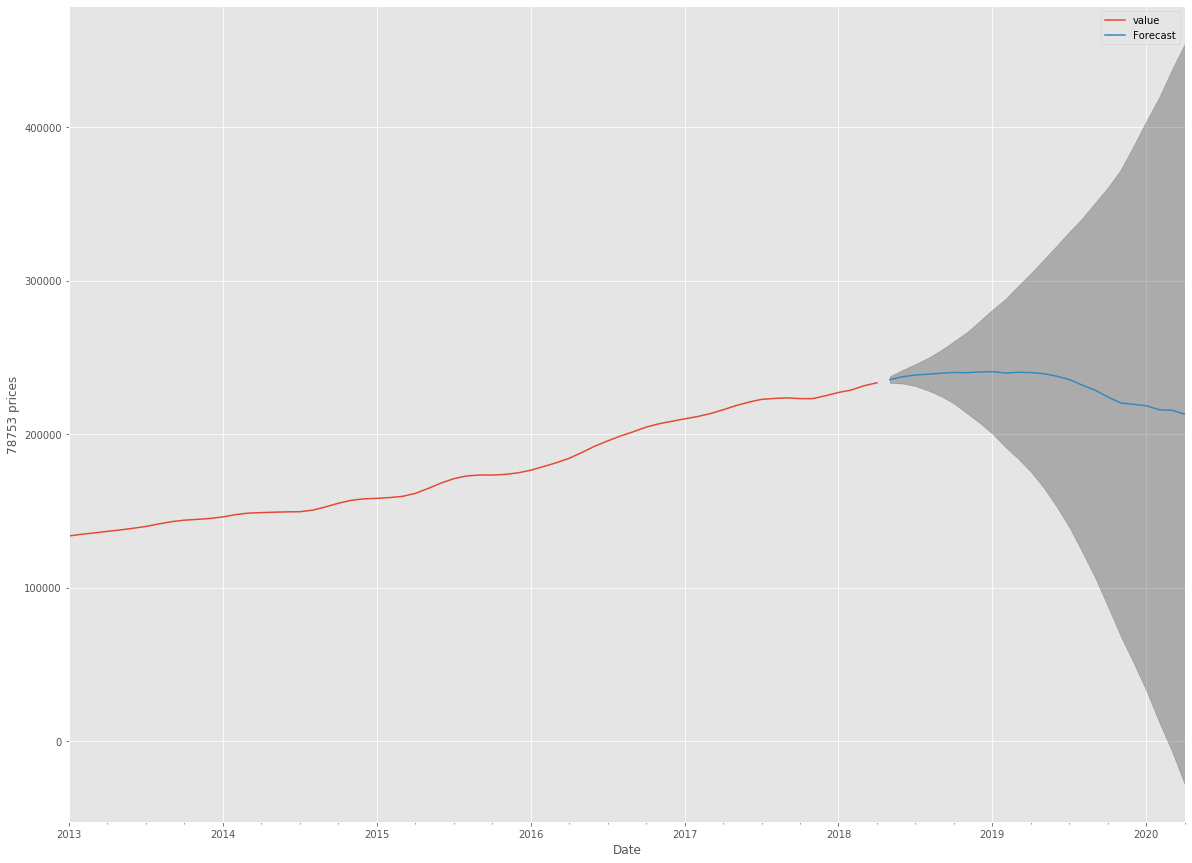

In [19]:
# acf, pacf
plot_acf_pacf(zip_78753, 78753)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78753, 
                                        order=(2, 2, 2), 
                                        seasonal_order=(2, 2, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78753['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78753_forecasted = pred.predicted_mean
zip_78753_truth = zip_78753['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78753_forecasted - zip_78753_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78753['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78753_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78753')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78753.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78753 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78753, roi_2] 

In [20]:
zip_78724 = zips_grouped.loc[78724]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78724,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1681.500871077919
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1343.1678028313165
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1147.9427269048622
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =888.5023897220224
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =859.3416840357788
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =831.7480527456873
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1094.5313204542153
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1075.1942804657604
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =877.5176326592989
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =858.6808213956192
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =618.4300262067271
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =1206.4500813848304
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =833.7962822258244
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =801.6197792608571
ARIMA (0, 0, 0)

ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =959.7409981717163
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =598.5061764292932
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =600.5425031138496
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =429.349265087483
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =432.17622899427295
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =242.08897747110896
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =929.5066271159269
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =730.0657061649905
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =790.6959137366873
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =589.6771633476371
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =637.9043169202405
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =1179.8119245400776
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =768.7922866876903
ARIMA (0, 2, 1) x (1, 0, 1, 12)1

ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =601.2293850562859
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =657.2900555786654
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1135.6960345033488
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =768.6163280159367
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =750.9542786836621
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =621.819371109089
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =597.4693200600934
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =452.00649963713516
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =426.2174261170708
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =582.4913041226155
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =578.8827946316969
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =423.3391003331942
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =424.79299412055104
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =239.84226269787484
ARIMA (1, 1, 1) x

ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =589.1031204329893
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =424.423299313175
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =425.6523077905609
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =246.12141890117655
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =600.5697311592439
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =930.6955557021929
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =750.4921028960401
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =812.177188243318
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =671.9703116146076
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =654.1020427144953
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =1081.6798517220755
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =762.0895008595116
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =748.026035652079
ARIMA (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =624.5522375011312
ARIMA (2, 0, 2) x (1,

ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =627.2051191577332
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =798.3474329591369
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =736.1914755880381
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =715.2652321397028
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =590.426602972188
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =574.605661420254
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =417.2896499915757
ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =921.7519584809678
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =545.2572903574554
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =551.8115725560393
ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =395.46032043437975
ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =396.6497018240092
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =214.048242378864
ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =215.2465739943252


pdq         (2, 2, 0)
pdqs    (2, 2, 0, 12)
aic           198.362
Name: 448, dtype: object

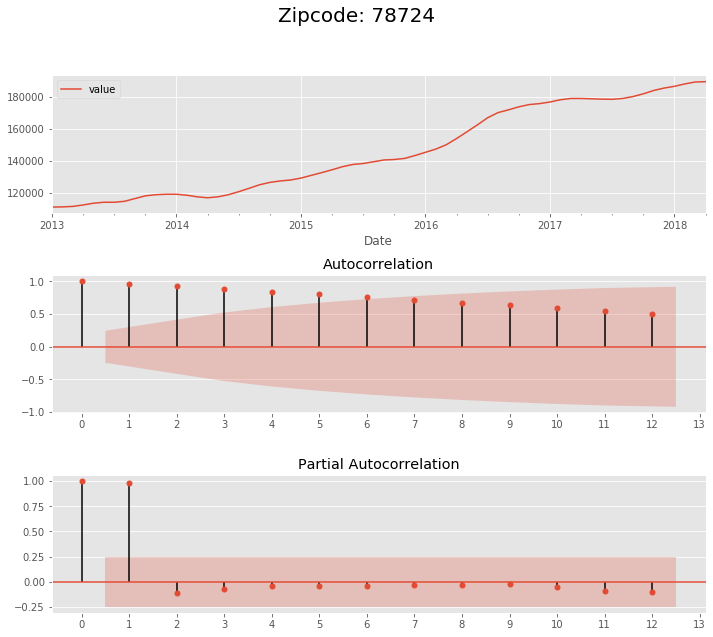

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2052      0.240      5.014      0.000       0.734       1.676
ar.L2         -0.7001      0.271     -2.580      0.010      -1.232      -0.168
ar.S.L12      -1.4279      0.285     -5.009      0.000      -1.987      -0.869
ar.S.L24      -0.9661      0.496     -1.949      0.051      -1.937       0.005
sigma2      3.842e+05    1.8e+05      2.134      0.033    3.14e+04    7.37e+05


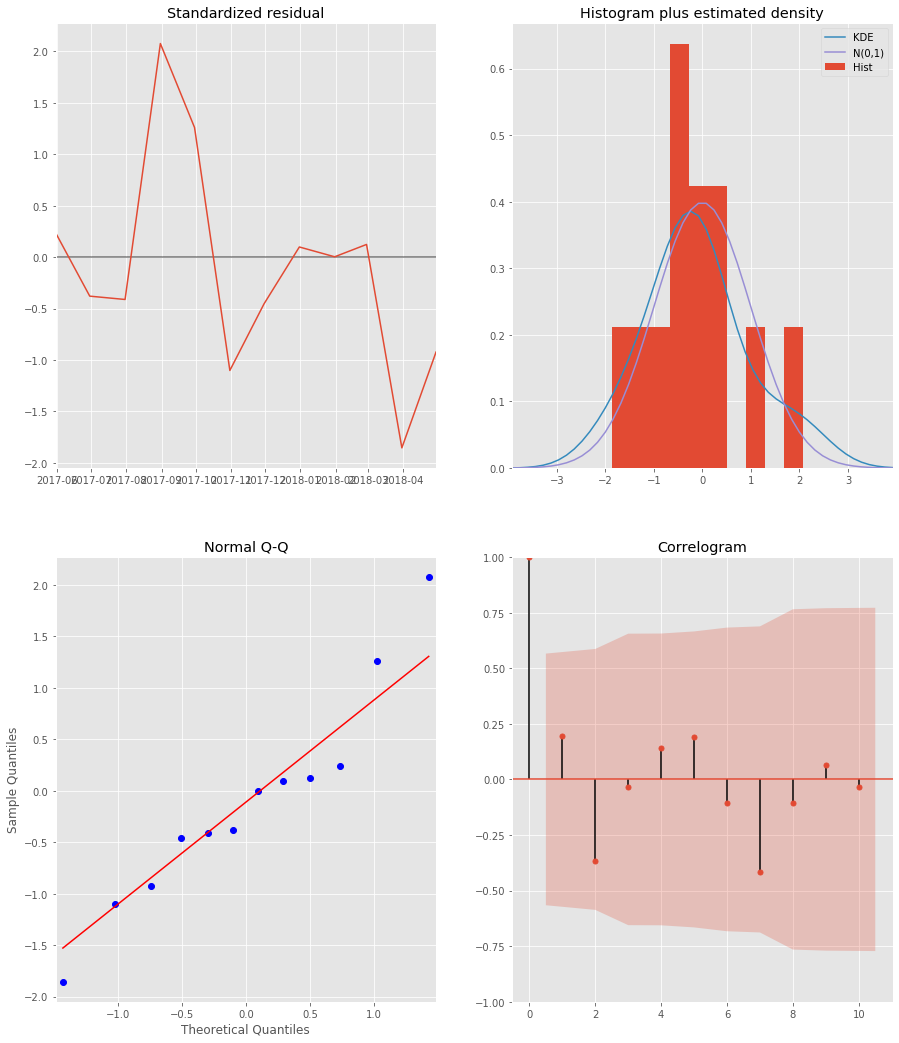

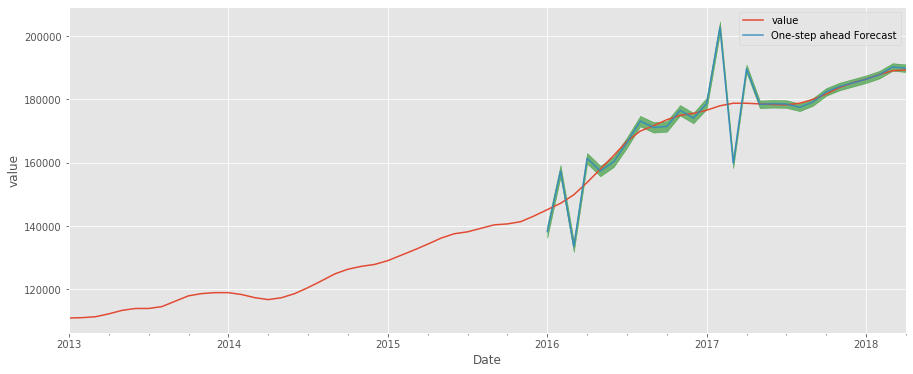

The Mean Squared Error of our forecasts is 57277275.13


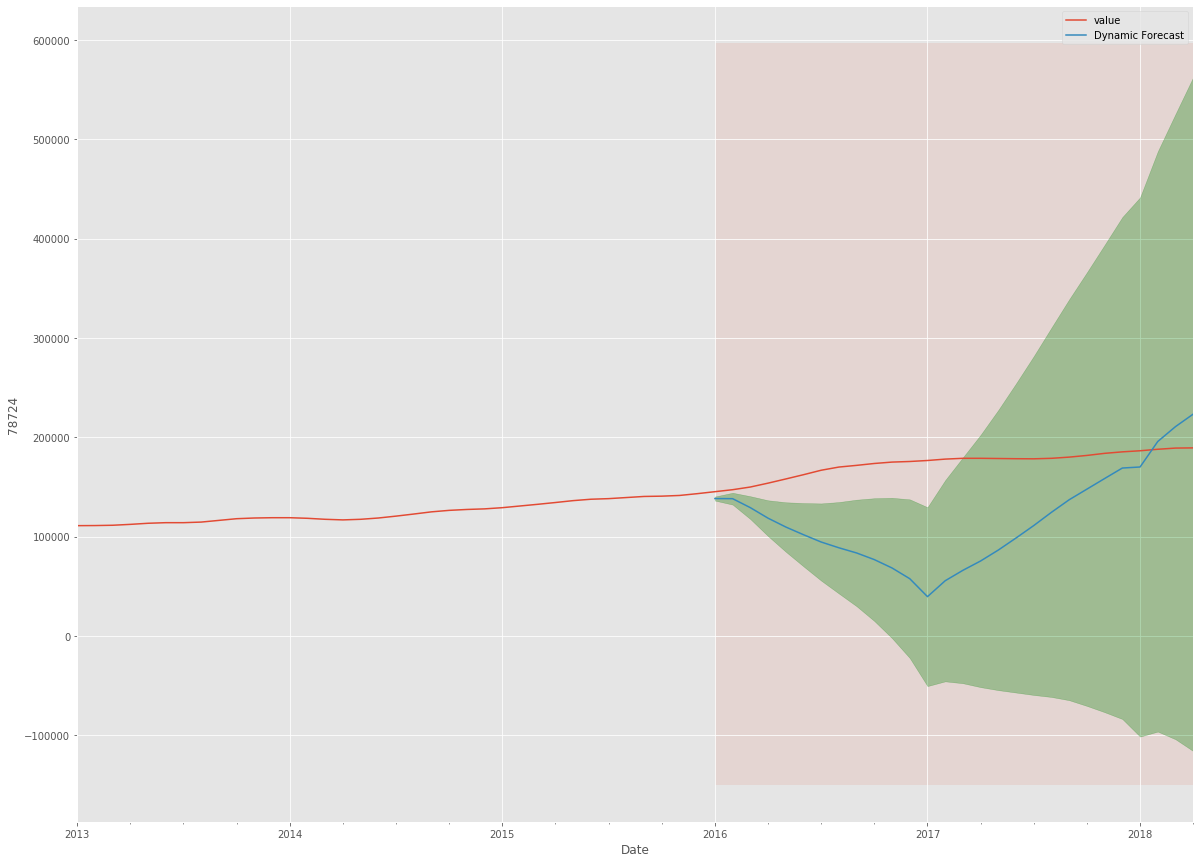

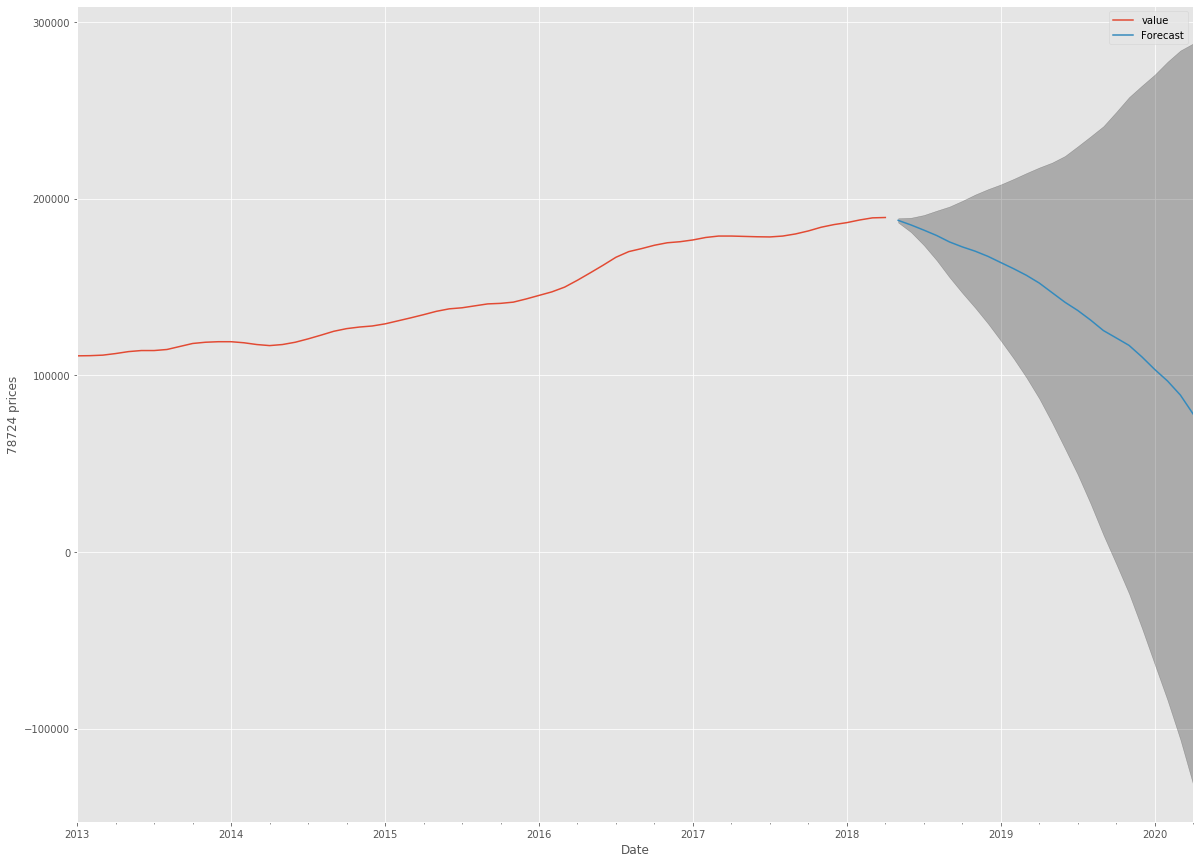

In [21]:
# acf, pacf
plot_acf_pacf(zip_78724, 78724)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78724, 
                                        order=(2, 2, 0), 
                                        seasonal_order=(2, 2, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78724['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78724_forecasted = pred.predicted_mean
zip_78724_truth = zip_78724['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78724_forecasted - zip_78724_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78724['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78724_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78724')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78724.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78724 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78724, roi_2] 

In [ ]:
zip_78723 = zips_grouped.loc[78723]
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_78723,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1766.0289173867675
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1407.0652528695312
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1187.8669645261944
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =916.8886386638459
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =838.4974346760083
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1164.0946979440998
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1071.1239240286454
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1041.2428846526886
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =861.6079826431969
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1206.3417676437937
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =604.356999202654
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =1145.7841738855507
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =809.4546056367221
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =1262.8092264627596
ARIMA (0, 0,

ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =442.2138945173705
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =615.2757450281472
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =617.0272906207133
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =440.3521260456016
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =442.47714742809114
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =239.537219074024
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =968.3368365688965
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =759.7973590406394
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =811.032170153448
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =598.5898878450687
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =645.3250343992994
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =1087.4876917533206
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =789.6847168642902
ARIMA (0, 2, 1) x (1, 0, 1, 12)12 

ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =608.999481600768
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =664.3333437735448
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1123.2144918916586
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =790.0928010442558
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =775.3299407379905
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =627.4223267000937
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =639.3023723123949
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =460.2701187091728
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =439.25671886266804
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =599.6513747133015
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =599.4829974527054
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =427.59527768413517
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =446.4966964396518
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =246.08904116244628
ARIMA (1, 1, 1) x

ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =599.5701335590667
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =632.2415973251692
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =430.79467246619765
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =456.24436281816804
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =245.81026860056915
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =247.6696819463962
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =961.044252372045
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =1246.594951136154
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =831.7081382851588
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =758.6392656459122
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =660.778667699547
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =2220.161215368472
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =785.7835790465883
ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =809.0812990788937
ARIMA (2, 0, 2) x (

In [ ]:
# acf, pacf
plot_acf_pacf(zip_78723, 78723)
plt.show()

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_78723, 
                                        order=(2, 2, 2), 
                                        seasonal_order=(1, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6
ax = zip_78723['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

# Get the real and predicted values
zip_78723_forecasted = pred.predicted_mean
zip_78723_truth = zip_78723['value']['2016-01-31':]

# Compute the mean square error
mse = ((zip_78723_forecasted - zip_78723_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.

ax = zip_78723['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), zip_78723_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('78723')

plt.legend()
plt.show()

# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = zip_78723.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('78723 prices')

plt.legend()
plt.show()

pred_conf['mean'] = prediction.predicted_mean
roi_2 = (pred_conf.iloc[23][2] - pred_conf.iloc[0][2])/pred_conf.iloc[0][2] * 100
roi_2

pred_roi_df.loc[len(pred_roi_df.index)] = [78723, roi_2] 